# Wrangle and analyze "WeRateDogs" data  

The project aims to wrangle and analyze the data of WeRateDoges on Twitter, the project inclueds three stages:
   1. Data gathering from various source and in defferent forrmats 
   2. Data wrangling 
   3. Data Analysis      

# Table of Content 
1. [Data Gathering](#dgather)
2. [Data Assessing](#dassess)
3. [Data cleaning](#dclean)
4. [Data Visualization](#dvisual)

In [1]:
# importing required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy 
import datetime
import json
import os
import re 
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline

## 1- Gather     <a class="anchor" id="dgather"></a>

### 1.1 WeRateDogs Twitter archive data frame 

Using panadas read_csv to import the archive file 'twitter-archive enhanced.csv' to DataFrame in name "df_arcv"
<a id="dg"> </a>

In [2]:
df_arcv = pd.read_csv('twitter-archive-enhanced.csv')
df_arcv.shape

(2356, 17)

### 1.2 Image data frame 

Extracting the file name form the URL then importing the file to DataFrame named "df_pic" 

In [3]:
# 1.2.1 Extracting the file name from the URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.rsplit("/",1)[1]
file_name

'image-predictions.tsv'

In [4]:
# 1.2.2 Requesting the file  from the URL
response = requests.get(url, allow_redirects=True)
print(response.status_code)

200


In [5]:
# 1.2.2 Wrting the file
with open(file_name, 'wb') as file:
     file.write(response.content)

In [6]:
# 1.2.2 Importing the file into DataFra "df_pic"
df_pic = pd.read_csv(file_name , sep='\t')
df_pic.shape

(2075, 12)

### 1.3 API data frame   

Downloading the API data Through Tweeter developer account then write json file and building DataFram API_df

In [ ]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

API_key = 'Hidden'
API_secret = 'Hidden'
Access_token = 'Hidden'
Access_token_secret = 'Hidden'

auth = OAuthHandler(API_key, API_secret)
auth.set_access_token(Access_token, Access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

test_tweet = api.get_status(df_arcv.tweet_id[100], tweet_mode = 'extended')
content = test_tweet._json
content

In [ ]:
# 1.3.1 Query Twitter API for  tweets in  Twitter archive and saving JSON as text file

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
tweet_ids = df_arcv.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

# 1.3.2 Save  tweets in JSON as line in the text file

with open('tweet_json.txt', 'w') as outfile:
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Done")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
Elapsed_time = end - start
print('\n Elapsed time:  '+ str(Elapsed_time))
print(fails_dict)

In [7]:
# 1.3.3 Writing json to text file 

Api_df_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        Api_df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
# 1.3.4 importing the text file to DataFram named "api_df_now"  

api_df_now = pd.DataFrame(Api_df_list)
api_df_now.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 4 columns):
favorite_count    2090 non-null int64
retweet_count     2090 non-null int64
tweet_id          2090 non-null int64
user_count        2090 non-null int64
dtypes: int64(4)
memory usage: 65.4 KB


## 2- Assess <a class="anchor" id="dassess"></a>

### 2.1 Archive data frame 

#### 2.1.1 Displaying the Archive data frame 

In [8]:
df_arcv

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### 2.1.2 Archive data frame information

In [9]:
df_arcv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are 78 reply and 181 retweet , they are not original tweets and shall be removed 

#### 2.1.3 Archive data frame check for duplicated rows

In [10]:
df_arcv.duplicated().sum()

0

#### 2.1.4 Descriptive statistis for archive data frame

In [11]:
df_arcv.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### 2.1.5 Explore the numerator

In [12]:
df_arcv['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

##### 2.1.6 Explore the denominator

In [13]:
df_arcv['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### 2.2 Image data frame 

#### 2.2.1 Displaying the Image data frame 

In [14]:
df_pic 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### 2.2.2 Image data frame information

In [15]:
df_pic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### 2.2.3 Image data frame check for duplicated rows

In [16]:
df_pic.duplicated().sum()

0

we have an issue with this picture its not for a real dog 
	870063196459192321	https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg


### 2.3 API data frame 

#### 2.3.1 Displaying the Archive data frame 

In [17]:
api_df_now 

,favorite_count,retweet_count,tweet_id,user_count
0,35159,7428,892420643555336193,8941542
1,30444,5522,892177421306343426,8940951
2,22893,3646,891815181378084864,8940951
3,38475,7599,891689557279858688,8940951
4,36739,8181,891327558926688256,8940951
5,18513,2743,891087950875897856,8940951
6,10768,1774,890971913173991426,8940951
7,59250,16611,890729181411237888,8940951
8,25494,3792,890609185150312448,8940951
9,29083,6434,890240255349198849,8940951


#### 2.3.2 API data frame information

In [18]:
api_df_now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 4 columns):
favorite_count    2090 non-null int64
retweet_count     2090 non-null int64
tweet_id          2090 non-null int64
user_count        2090 non-null int64
dtypes: int64(4)
memory usage: 65.4 KB


#### 2.3.3 API data frame check for duplicated rows

In [19]:
api_df_now.duplicated().sum()

0

### 2.4 Data assessing Summary 

### Quality
##### `Archive`  DataFrame
- Invalid data in the tweet data, some are retweets, others are replies
- Some tweets have no retweet data in the API data frame
- Incomplete data in the URLs
- Erroneous datatypes for most of columns
- Invalid data in the denominator column ( as zero )
- Inaccurate data in the numenator column 
- Some tweets are not based on dog picture 

##### `Image` DataFrame
- Some images have no original tweets in the Archive data frame
- Columns header of breed prediction are not well descriptive
- Erroneous datatypes for most of columns

##### `API ` DataFrame
- Some tweets have no images in the image data frame
- Erroneous datatypes for most of columns




### Tidiness
- Stage of dog records are scattered over four columns
- Data are divided in three data frames of different shapes 

## 3- Data Cleaning <a class="anchor" id="dclean"></a>

### 3.1 Copy data frames into clean ones 

In [20]:
arcv_clean = df_arcv.copy()
image_clean = df_pic.copy() 
api_clean = api_df_now.copy() 

### 3.2 Invalid data 

#### `archive`: Clean archive data frame form replies and retweets

##### Define
Rebuild the data frame ignoring the rows of replies and retweets

##### Code

In [21]:
# 3.2.1 droping the replies form the archive 
arcv_clean_cut_reply = arcv_clean[arcv_clean.in_reply_to_status_id.isnull()]

##### Test

In [22]:
arcv_clean_cut_reply.shape

(2278, 17)

##### Code

In [23]:
# 3.1.2 droping the retweets form the archive
arcv_clean_cut_retweet = arcv_clean_cut_reply[arcv_clean_cut_reply.retweeted_status_id.isnull()]

##### Test

In [24]:
arcv_clean_cut_retweet.shape

(2097, 17)

##### Define
Removing the empty columns of replies and retweets, to get archive with only original tweets `arcv_original_tweet`

##### Code

In [25]:
# 3.1.3 Removing the empty columns 
arcv_clean_cut_retweet.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [26]:
arcv_original_tweet = arcv_clean_cut_retweet.copy() 

##### Test

In [27]:
arcv_original_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### 3.3 Missed data 

####  `archive`: Clean archive  form  tweets which of no images in the `image` data frame

##### Define
Removing the orignal tweets from the archive data frame which have no images in the `image` data frame. the cleaned data frame is named arcv_orign_image

##### Code

In [28]:
# 3.3.1 creating a list of tweet_ids in image_clean named "image_ids" 
image_ids = list(image_clean.tweet_id.unique())

# 3.3.2 removing the tweets of no images 
arcv_orign_image = arcv_original_tweet[arcv_original_tweet.tweet_id.isin(image_ids)]


##### Test

In [29]:
arcv_orign_image.shape 

(1971, 12)

### 3.4 Missed data 

####  `archive`: Clean archive  form  tweets which of no retwwets in the `api` data frame

##### Define
Removing the orignal tweets with images from the arcv_orign_image data frame which have no retweets in the `api_clean` data frame. the cleaned data frame is named arcv_orign_image_retweet

##### Code

In [30]:
# 3.3.1 creating a list of tweet ids in the api cleaned api data frame
retweet_ids = list(api_clean.tweet_id.unique())

# Removing tweets of no retweets in the API DataFram from the archive 
arcv_orign_image_retweet = arcv_orign_image[arcv_orign_image.tweet_id.isin(retweet_ids)]

##### Test

In [31]:
arcv_orign_image_retweet.shape

(1964, 12)

 Now, we have a modified archive with tweets have corresponding images and retweets in the relevant image and api data frames, let's copy it to arcv_cleaned to shorten the name.

##### Code

In [32]:
arcv_cleaned = arcv_orign_image_retweet.copy()

##### Test

In [33]:
arcv_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
dtypes: int64(3), object(9)
memory usage: 199.5+ KB


## Iterate Assess 
The problem of the missed URLs has been vanished after cleaning; we don't have to work on it 

### 3.5 Tidiness 1 
The data are in three data frames, in order to merge them in one master data frame we need first to align the image and api data frames with the cleaned archive data frame  

##### Define
Removing the records from the image data frame of which have no tweets in the cleaned archive data frame, which will result in new image data frame named image_cleaned  

##### Code

In [34]:
# 3.5.1 creating a list of tweets of the cleaned archive data frame 
arcv_cleaned_ids = list(arcv_cleaned.tweet_id.unique())

In [35]:
# 3.5.2 Align image DataFrame with the cleaned archive DataFrame
image_cleaned = image_clean[image_clean.tweet_id.isin(arcv_cleaned_ids)]

##### Test

In [36]:
image_cleaned.shape

(1964, 12)

##### Define
Removing the records from the API data frame of which have no tweets in the cleaned archive data frame, which will result in new api data frame named api_cleaned  

In [37]:
# 3.5.3 Align API DataFrame with archive DataFrame
api_cleaned = api_clean[api_clean.tweet_id.isin(arcv_cleaned_ids)]

##### Test

In [38]:
api_cleaned.shape

(1964, 4)

### 3.6  Merging the data frames

##### Define
Merging the three data frames together in one master data frame

##### 3.6.1. Merging The cleaned archive data frame with cleaned API data frame 

##### Code

In [39]:
# merge arcv_cleaned with api_cleaned in df_arcv_api 
df_arcv_api = pd.merge(arcv_cleaned,api_cleaned, left_on="tweet_id",right_on="tweet_id", how="inner")

##### Test

In [40]:
df_arcv_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 15 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
user_count            1964 non-null int64
dtypes: int64(6), object(9)
memory usage: 245.5+ KB


##### 3.6.2. Merging The image data frame, with the combined data frame  

##### Code

In [41]:
df_arcv_api_image = pd.merge(df_arcv_api,image_cleaned, on="tweet_id", how="inner")

##### Test

In [42]:
df_arcv_api_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 26 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
user_count            1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null objec

### 3.7 Copying the combined data frame to master data frame


In [43]:
df_master = df_arcv_api_image.copy()
df_master.shape

(1964, 26)

### 3.8 Tidiness 2
doge stage records are in four columns, we combine them in one column named stage 
##### Define
To replace the None value in the columns with '' and combine them by column addtion then delete the four coulmns 

##### Code

In [44]:
# 3.8.1 Replace None in stage columns with empty string 
df_master.doggo.replace('None', '', inplace=True)  
df_master.floofer.replace('None', '', inplace=True) 
df_master.pupper.replace('None', '', inplace=True) 
df_master.puppo.replace('None', '', inplace=True) 

In [45]:
# 3.8.2 combine stage columns 
df_master['stage'] = df_master.doggo + df_master.floofer + df_master.pupper + df_master.puppo

In [46]:
# 3.8.3 delete columns 
df_master.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

##### Test

In [47]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 23 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
user_count            1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1964 non-null float6

In [48]:
df_master['stage'].value_counts()

                1662
pupper           201
doggo             62
puppo             22
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

#### Define 
3.8.4 Some tweets includes two dogs of different stage

##### Code

In [49]:
# 3.8.4 Solve the issue of two dogs in image 
df_master.loc[df_master.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df_master.loc[df_master.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df_master.loc[df_master.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

##### Test

In [50]:
df_master['stage'].value_counts()

                 1662
pupper            201
doggo              62
puppo              22
doggo,pupper        8
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

Copying the master data frame to master_stage

In [51]:
master_stage = df_master.copy()

### 3.9 Rename columns

##### Define
The headers of the breed prediction columns are not descriptive, it will be renamed to more descriptive headers

##### Code

In [52]:
# 3.9 rename the 9 columns
master_stage.rename(columns= {"p1": "breed_prediction_1", "p1_conf": "prediction_1_confidence","p1_dog": "breed_1_validity"}, inplace = True )
master_stage.rename(columns= {"p2": "breed_prediction_2", "p2_conf": "prediction_2_confidence","p2_dog": "breed_2_validity"}, inplace = True )  
master_stage.rename(columns= {"p3": "breed_prediction_3", "p1_conf": "prediction_3_confidence","p3_dog": "breed_3_validity"}, inplace = True )

##### Test

In [53]:
master_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 23 columns):
tweet_id                   1964 non-null int64
timestamp                  1964 non-null object
source                     1964 non-null object
text                       1964 non-null object
expanded_urls              1964 non-null object
rating_numerator           1964 non-null int64
rating_denominator         1964 non-null int64
name                       1964 non-null object
favorite_count             1964 non-null int64
retweet_count              1964 non-null int64
user_count                 1964 non-null int64
jpg_url                    1964 non-null object
img_num                    1964 non-null int64
breed_prediction_1         1964 non-null object
prediction_1_confidence    1964 non-null float64
breed_1_validity           1964 non-null bool
breed_prediction_2         1964 non-null object
prediction_2_confidence    1964 non-null float64
breed_2_validity           1964 non-

**Copying the master data frame to master_renamed** 

In [54]:
master_renamed = master_stage.copy()

### 3.10 Change columns to appropriate data type

##### Define
The names of the breed prediction columns are not descriptive, it will be renamed to more descrptive names

##### Code

In [55]:
# 3.10.1 change time stamp column to date time 
master_renamed['timestamp'] = pd.to_datetime(master_renamed['timestamp'])

In [56]:
# 3.10.2 change tweet_id column to string 
master_renamed['tweet_id']=master_renamed['tweet_id'].astype(str)

In [57]:
# 3.10.3 change rating_numerator and rating_denominator column to float
master_renamed['rating_numerator']=master_renamed['rating_numerator'].astype(float)
master_renamed['rating_denominator']=master_renamed['rating_denominator'].astype(float)

In [58]:
# 3.10.4 change stage, prediction columns to category 
master_renamed['stage']=master_renamed['stage'].astype('category')
master_renamed['breed_prediction_1'] = master_renamed['breed_prediction_1'].astype('category')
master_renamed['breed_prediction_2'] = master_renamed['breed_prediction_2'].astype('category')
master_renamed['breed_prediction_3'] = master_renamed['breed_prediction_3'].astype('category')

##### Test

In [59]:
master_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 23 columns):
tweet_id                   1964 non-null object
timestamp                  1964 non-null datetime64[ns]
source                     1964 non-null object
text                       1964 non-null object
expanded_urls              1964 non-null object
rating_numerator           1964 non-null float64
rating_denominator         1964 non-null float64
name                       1964 non-null object
favorite_count             1964 non-null int64
retweet_count              1964 non-null int64
user_count                 1964 non-null int64
jpg_url                    1964 non-null object
img_num                    1964 non-null int64
breed_prediction_1         1964 non-null category
prediction_1_confidence    1964 non-null float64
breed_1_validity           1964 non-null bool
breed_prediction_2         1964 non-null category
prediction_2_confidence    1964 non-null float64
breed_2_validity   

**Copying the master data frame to master_cleaner** 

In [60]:
master_cleaner = master_renamed.copy()

In [61]:
master_cleaner.shape

(1964, 23)

### 3.11 Cleaning the rating values

##### Define
Some records in both numerator and denominator colums either invaild. illogical or wrongly extracted. reassess these values after cleaning

In [62]:
master_cleaner['rating_denominator'].value_counts()

10.0     1947
50.0        3
80.0        2
11.0        2
170.0       1
150.0       1
2.0         1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
7.0         1
70.0        1
Name: rating_denominator, dtype: int64

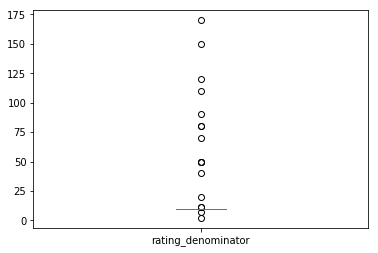

In [63]:
master_cleaner.rating_denominator.plot(kind='box');

In [64]:
master_cleaner['rating_numerator'].value_counts()

12.0      444
10.0      416
11.0      392
13.0      249
9.0       150
8.0        95
7.0        52
14.0       33
5.0        33
6.0        32
3.0        19
4.0        16
2.0         9
1.0         5
24.0        1
27.0        1
84.0        1
0.0         1
420.0       1
121.0       1
50.0        1
80.0        1
45.0        1
60.0        1
44.0        1
26.0        1
144.0       1
88.0        1
165.0       1
75.0        1
1776.0      1
99.0        1
204.0       1
Name: rating_numerator, dtype: int64

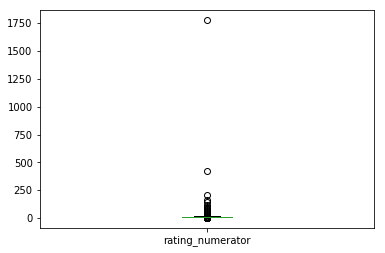

In [65]:
master_cleaner.rating_numerator.plot(kind='box');

**The boxplots of both the numerator and denominator clearly show lots of outliers which indicates lots of odd values** 

#### Define
Exporting the master cleaner as csv and manually explored by microsoft excel, which resulted in a list of tweets on pictures not for real dogs, and should be removed, the ids of these tweets are assembled in the list : no_dog 

In [66]:
# Exporting master_stage  to csv for manual assessing using microsoft excel
master_stage.to_csv('master_stage.csv', index=False)

In [67]:
# list of image for no dogs 
no_dog = ['749981277374128128', 
'670842764863651840',
'675153376133427200',
'670783437142401025',
'667549055577362432',
'666104133288665088',
'678675843183484930',
'678424312106393600',
'674265582246694913',
'670826280409919488',
'668142349051129856',
'666786068205871104',
'666411507551481857',
'666051853826850816',
'777885040357281792',
'718246886998687744',
'706901761596989440',
'699088579889332224',
'693590843962331137',
'686003207160610816',
'681302363064414209',
'676098748976615425',
'674690135443775488',
'674045139690631169',
'673906403526995968',
'673700254269775872',
'670055038660800512',
'668643542311546881',
'667937095915278337',
'666837028449972224',
'666293911632134144',
'760252756032651264',
'757596066325864448',
'714631576617938945',
'707420581654872064',
'695064344191721472',
'684567543613382656',
'680940246314430465',
'673715861853720576',
'671122204919246848',
'670838202509447168',
'668981893510119424',
'667176164155375616',
'666649482315059201']

**Removing rows of no-dog pictures** 

##### Code

In [68]:
for dog in no_dog :
    index_id = master_cleaner[master_cleaner['tweet_id'] == dog].index
    master_cleaner.drop(index_id , inplace = True)

##### Test

In [69]:
master_cleaner.shape 

(1920, 23)

Some tweets need manual correction by case

* 722974582966214656 change numerator to 13 and denominator to 10
* 667878741721415682 change numerator to 12
* 680494726643068929 change numerator to 11.26
* 778027034220126208 change numerator to 11.27
* 810984652412424192 fill in with average
* 786709082849828864 change numerator to 9.75



In [70]:
correct = ['722974582966214656',
           '667878741721415682',
           '680494726643068929',
           '778027034220126208',
           '810984652412424192',
           '786709082849828864']
for dog in correct :
    dog in master_cleaner.tweet_id.unique()

In [71]:
# 3.11.2.1 display the numerator value of tweet 722974582966214656
ind_1 = master_cleaner[master_cleaner['tweet_id']=='722974582966214656'].index
master_cleaner.loc[ind_1,'rating_numerator']

878    4.0
Name: rating_numerator, dtype: float64

In [72]:
# 3.11.2.1 display the denominator value of tweet 722974582966214656
ind_1 = master_cleaner[master_cleaner['tweet_id']=='722974582966214656'].index
master_cleaner.loc[ind_1,'rating_denominator']

878    20.0
Name: rating_denominator, dtype: float64

In [73]:
# 3.11.2.1 assign the correct value to the numerator of  722974582966214656
master_cleaner.loc[ind_1,'rating_numerator']= 13.0
master_cleaner.loc[ind_1,'rating_numerator'] 

878    13.0
Name: rating_numerator, dtype: float64

In [74]:
# 3.11.2.1 assign the correct value to the denominator of  722974582966214656
master_cleaner.loc[ind_1,'rating_denominator']= 10.0
master_cleaner.loc[ind_1,'rating_denominator']

878    10.0
Name: rating_denominator, dtype: float64

In [75]:
# 3.11.2.2 display the numerator value of tweet 667878741721415682
ind_2 = master_cleaner[master_cleaner['tweet_id']=='667878741721415682'].index
master_cleaner.loc[ind_2,'rating_numerator']

1857    2.0
Name: rating_numerator, dtype: float64

In [76]:
# 3.11.2.2 assign the correct value to the numerator of 667878741721415682
master_cleaner.loc[ind_2,'rating_numerator']= 12
master_cleaner.loc[ind_2,'rating_numerator'] 

1857    12.0
Name: rating_numerator, dtype: float64

In [77]:
# 3.11.2.3 display the numerator value of tweet 680494726643068929
ind_3 = master_cleaner[master_cleaner['tweet_id']=='680494726643068929'].index
master_cleaner.loc[ind_3,'rating_numerator']

1353    26.0
Name: rating_numerator, dtype: float64

In [78]:
# 3.11.2.3 assign the correct value to the numerator of 680494726643068929
master_cleaner.loc[ind_3,'rating_numerator']= 11.26
master_cleaner.loc[ind_3,'rating_numerator'] 

1353    11.26
Name: rating_numerator, dtype: float64

In [79]:
# 3.11.2.4 display the numerator value of tweet 778027034220126208
ind_4 = master_cleaner[master_cleaner['tweet_id']=='778027034220126208'].index
master_cleaner.loc[ind_4,'rating_numerator']

544    27.0
Name: rating_numerator, dtype: float64

In [80]:
# 3.11.2.4 assign the correct value to the numerator of 778027034220126208
master_cleaner.loc[ind_4,'rating_numerator']= 11.27
master_cleaner.loc[ind_4,'rating_numerator'] 

544    11.27
Name: rating_numerator, dtype: float64

In [81]:
# 3.11.2.5 display the numerator value of tweet 786709082849828864
ind_5 = master_cleaner[master_cleaner['tweet_id']=='786709082849828864'].index
master_cleaner.loc[ind_5,'rating_numerator']

495    75.0
Name: rating_numerator, dtype: float64

In [82]:
# 3.11.2.5 assign the correct value to the numerator of 786709082849828864
master_cleaner.loc[ind_5,'rating_numerator']= 9.75
master_cleaner.loc[ind_5,'rating_numerator'] 

495    9.75
Name: rating_numerator, dtype: float64

In [83]:
# 3.11.2.6 display the numerator value of tweet 810984652412424192
ind_6 = master_cleaner[master_cleaner['tweet_id']=='810984652412424192'].index
master_cleaner.loc[ind_6,'rating_numerator']

378    24.0
Name: rating_numerator, dtype: float64

In [84]:
# 3.11.2.6 assign the average value to numerator of 810984652412424192
master_cleaner.loc[ind_6,'rating_numerator']= master_cleaner['rating_numerator'].mean()
master_cleaner.loc[ind_6,'rating_numerator'] 

378    11.255354
Name: rating_numerator, dtype: float64

In [85]:
# 3.11.2.6 display the denominator value of tweet 810984652412424192
ind_6 = master_cleaner[master_cleaner['tweet_id']=='810984652412424192'].index
master_cleaner.loc[ind_6,'rating_denominator']

378    7.0
Name: rating_denominator, dtype: float64

In [86]:
# 3.11.2.6 assign the standard denominatr value (10) to 810984652412424192
master_cleaner.loc[ind_6,'rating_numerator']= 10.0
master_cleaner.loc[ind_6,'rating_numerator'] 

378    10.0
Name: rating_numerator, dtype: float64

### Define
3.11.3 We still have the problem of the tweets with pictures of more than one dog by adding new column for rating by dividing the rating_numenator by the rating_denominator

##### Code

In [87]:
# 3.11.3 inserting the rating column
master_cleaner['rating']= master_cleaner['rating_numerator'] / master_cleaner['rating_denominator'] 

##### Test

In [88]:
master_cleaner['rating'].value_counts()

1.200000    449
1.000000    418
1.100000    397
1.300000    250
0.900000    150
0.800000     95
0.700000     51
0.500000     34
1.400000     33
0.600000     32
0.400000      2
0.300000      2
1.127000      1
0.818182      1
0.636364      1
1.126000      1
0.975000      1
0.000000      1
1.428571      1
Name: rating, dtype: int64

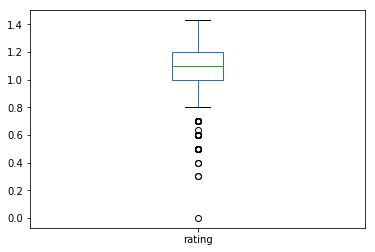

In [89]:
master_cleaner.rating.plot(kind='box');

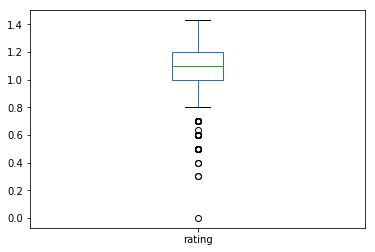

In [90]:
master_cleaner.rating.plot(kind='box');

**Clearly there there are much less outlier in the rating distriution campared to those of numenator and denominator**

**Copying master_cleaner to master**

In [91]:
master = master_cleaner.copy()

In [92]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 1963
Data columns (total 24 columns):
tweet_id                   1920 non-null object
timestamp                  1920 non-null datetime64[ns]
source                     1920 non-null object
text                       1920 non-null object
expanded_urls              1920 non-null object
rating_numerator           1920 non-null float64
rating_denominator         1920 non-null float64
name                       1920 non-null object
favorite_count             1920 non-null int64
retweet_count              1920 non-null int64
user_count                 1920 non-null int64
jpg_url                    1920 non-null object
img_num                    1920 non-null int64
breed_prediction_1         1920 non-null category
prediction_1_confidence    1920 non-null float64
breed_1_validity           1920 non-null bool
breed_prediction_2         1920 non-null category
prediction_2_confidence    1920 non-null float64
breed_2_validity   

## 3.12. Saving the master data frame as as csv

In [93]:
master.to_csv('twitter_archive_master.csv', index=False)

-------------------------------------------------------------------------------

## 4. Data Visualization <a class="anchor" id="dvisual"></a>

### 4.1 Exploring the time performance of the site
#### Define
The number of reteets and favorites may indicate the popularity and the level of interaction on `WERateDogs`, a time series plot of both retweet and favorites can be indicative

##### Code

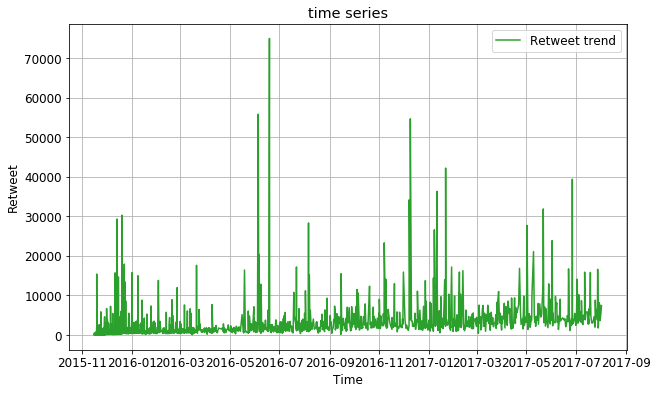

In [94]:
# plotting retweets count as time series
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(master.timestamp, master.retweet_count, color='tab:green', label='Retweet trend')
ax.set_xlabel('Time')
ax.set_ylabel('Retweet')
ax.set_title('time series')
ax.grid(True)
ax.legend(loc='upper right');

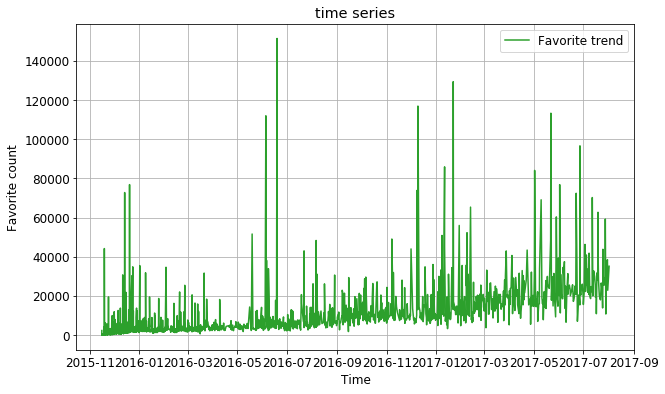

In [95]:
# plotting favorite count as time series
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(master.timestamp, master.favorite_count, color='tab:green', label='Favorite trend')
ax.set_xlabel('Time')
ax.set_ylabel('Favorite count')
ax.set_title('time series')
ax.grid(True)
ax.legend(loc='upper right');

### Insight one:
Despite the normal vartion in the number of retweets and favorits, the graph shows steady increase in both retweets and favorites by time , which could be consider as performance indicator for the business of the `WeRateDogs`

### 4.2 Study the distribution of rating 
#### Define


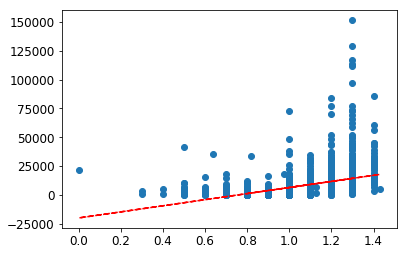

In [96]:
# plot scatter diagram between rating and favorite count 
x = master['rating']
y = master['favorite_count']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--");

In [97]:
master['rating'].corr(master['favorite_count'], 'pearson')

0.41029047818229647

In [98]:
master['rating'].mode()

0    1.2
dtype: float64

In [99]:
master['rating'].mean()

1.0703703733766232

In [100]:
master['rating'].skew()

-1.0116410318854065

### Insight two :
The scatter diagram between the rating and the favorite counts, indicates weak correlation between them, which undermine the importance of the original rating and its impact on the number of favorites and retweets, it may also suggest that the visitors just reflect their own impressions. the conclusion drawn from the graph is also augmented the the value of Pearson correlation coefficient, the study of the graph and the above descriptive statistics show:
* the rating is almost discrete variable, although it is set as float, because the visitors tends to give ratings as integers
* The rating distribntions has its mode around 1.2 with negative skewness, the negative skewness is due to the outliers of giving ratings numerators below 10, unlike the common style

### 4.3 Study the distribution of dog breeds
#### Define
Plotting bar chart for the value count of dog breed prediction 

In [101]:
breed_count = master['breed_prediction_1'].value_counts(ascending = True)
breed_top_count = breed_count.tail(20)

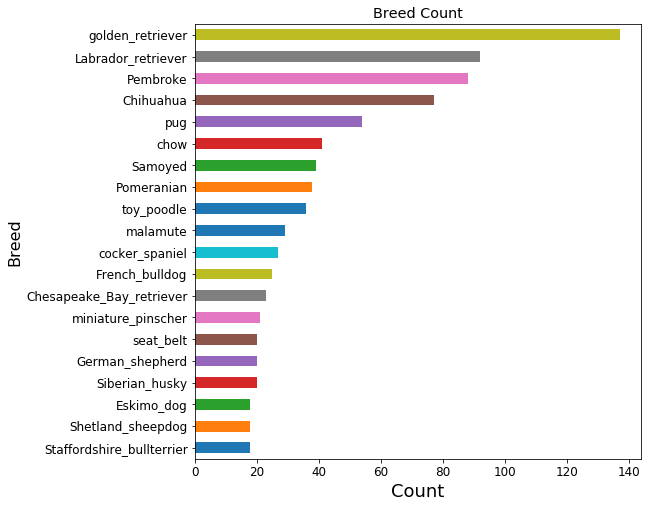

In [102]:
ax = breed_top_count.plot(kind='barh',figsize=(8,8),title='Breed Count');
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Count', fontsize=18)
plt.ylabel('Breed', fontsize=16)
plt.show()

**Plotting the the sum favorite count per breed**

In [103]:
breed_fav_count = master.groupby(['breed_prediction_1'],as_index = False)['favorite_count'].sum()
breed_fav_count_sort = breed_fav_count.sort_values(by=['favorite_count'])
top_count = breed_fav_count_sort.tail(20)

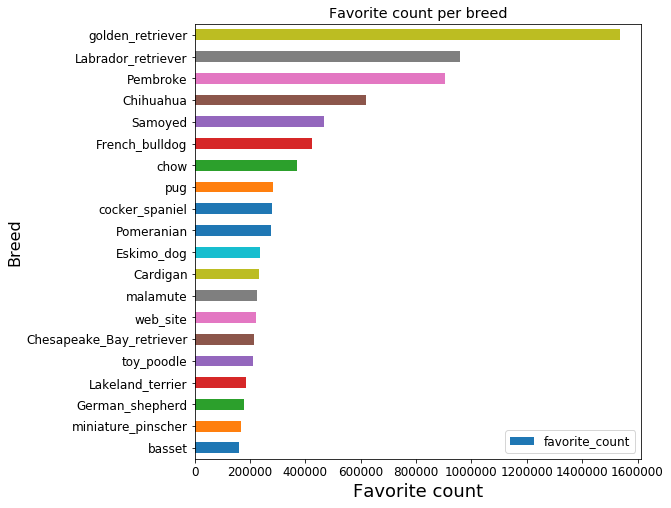

In [104]:
ax = top_count.plot(x='breed_prediction_1', y='favorite_count',kind='barh',figsize=(8,8),title='Favorite count per breed');
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Favorite count', fontsize=18)
plt.ylabel('Breed', fontsize=16)
plt.show()

### Insight Three :
Two bar charts were plotted for the top 10 breads in count and favorite counts, the garphs show that the golden retriever is by far the most popular as it is one of the highest value count, this is explain why it gains the hightest value of favorites counts.

* The shape of the bar chart has feature of Pareto distribution
* WeRateDogs may have list of vital few number of breeds can attract most of interactions